In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data
X_full = pd.read_csv('train.csv')#, index_col='Id')
#X_test_full = pd.read_csv('test.csv', index_col='Id')

In [3]:
#Shape of dataset and sample
print("Shape of Dataset {}".format(X_full.shape))

Shape of Dataset (59381, 128)


In [4]:
X_full.head(10)

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8
5,10,1,D2,26,0.230769,3,1,1,0.507463,0.836364,...,0,0,0,0,0,0,0,0,0,8
6,11,1,A8,10,0.166194,2,3,1,0.373134,0.581818,...,0,0,0,0,0,0,0,0,0,8
7,14,1,D2,26,0.076923,2,3,1,0.611940,0.781818,...,0,0,0,0,0,0,0,0,0,1
8,15,1,D3,26,0.230769,2,3,1,0.522388,0.618182,...,0,0,0,0,0,0,0,0,0,8
9,16,1,E1,21,0.076923,2,3,1,0.552239,0.600000,...,0,0,0,0,0,0,0,0,0,1


Unique datatype in Target Variable: int64
Unique values in Target Variable: [8 4 1 6 2 7 3 5]
Total Number of unique values : 8


Text(0.5, 1.0, 'Distribution of rows by response categories')

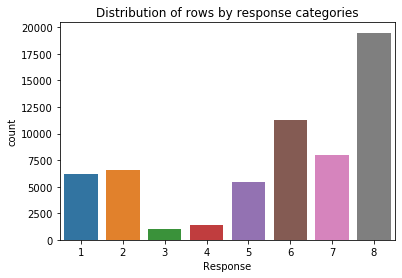

In [5]:
print("Unique datatype in Target Variable: {}".format(X_full.Response.dtype))
print("Unique values in Target Variable: {}".format(X_full.Response.unique()))
print("Total Number of unique values : {}".format(len(X_full.Response.unique())))

#distribution plot for target classes
sns.countplot(x=X_full.Response).set_title('Distribution of rows by response categories')

In [6]:
#create a funtion to create a new target variable based on conditions
def new_target(row):
    if (row['Response']<=7) & (row['Response']>=0):
        val=0
    elif (row['Response']==8):
        val=1
    else:
        val=-1
    return val

In [7]:
#create a copy of original dataset
new_data=X_full.copy()

In [8]:
new_data.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [9]:
#create a new column
new_data['Final_Response']=new_data.apply(new_target,axis=1)

In [10]:
new_data.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response,Final_Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,8,1
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,4,0
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,8,1
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,8,1
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,8,1


Unique datatype in Target Variable: int64
Unique values in Target Variable: [1 0]
Total Number of unique values : 2


Text(0.5, 1.0, 'Distribution of rows by response categories')

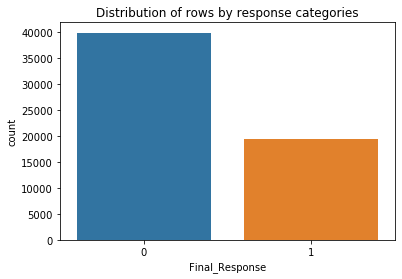

In [11]:
#print unique values of target variable
print("Unique datatype in Target Variable: {}".format(new_data.Final_Response.dtype))
print("Unique values in Target Variable: {}".format(new_data.Final_Response.unique()))
print("Total Number of unique values : {}".format(len(new_data.Final_Response.unique())))

#distribution plot for target classes
sns.countplot(x=new_data.Final_Response).set_title('Distribution of rows by response categories')

In [13]:
#y = X_full.Response
y = new_data['Final_Response']
X = X_full.drop(labels=['Response'],axis=1)

#drop categorical column
X_dropped = X.drop(axis=1,labels=["Product_Info_2"])
#drop columns with any null
X_dropped.dropna(axis=1,inplace=True)

# Break off validation set from training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_dropped,y,test_size=0.3,random_state=142)

#create train and test dataset after dropping columns with null values and categorical column

#drop categorical column
#X_dropped_train=X_train.drop(axis=1,labels=["Product_Info_2"]).copy()
#X_dropped_valid=X_valid.drop(axis=1,labels=["Product_Info_2"]).copy()

#drop columns with any null
#X_dropped_train.dropna(axis=1,inplace=True)
#X_dropped_valid.dropna(axis=1,inplace=True)

# print shape of dataset
print("Shape of X_train dataset {}".format(X_train.shape))
print("Shape of X_test dataset {}".format(X_test.shape))

print("Shape of y_train dataset {}".format(y_train.shape))
print("Shape of y_test dataset {}".format(y_test.shape))

Shape of X_train dataset (41566, 113)
Shape of X_test dataset (17815, 113)
Shape of y_train dataset (41566,)
Shape of y_test dataset (17815,)


In [14]:
X_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 113 entries, Id to Medical_Keyword_48
dtypes: float64(5), int64(108)
memory usage: 51.2 MB


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn import ensemble
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,accuracy_score,precision_score
from sklearn.model_selection import train_test_split

In [20]:
#set seed for same results everytime
seed=120

#declare the models
dt=DecisionTreeClassifier(random_state=seed)
rf=RandomForestClassifier(random_state=seed)
lr=LogisticRegression(random_state=seed)
adb=ensemble.AdaBoostClassifier()
bgc=ensemble.BaggingClassifier()
gbc=ensemble.GradientBoostingClassifier()
xgb=XGBClassifier(random_state=seed)
sgdc=SGDClassifier(random_state=seed)
svc=SVC(random_state=seed)
knn=KNeighborsClassifier()
nb=GaussianNB()

#create a list of models
models=[dt,rf,lr,adb,bgc,gbc,svc,xgb]

def score_model(X_train,y_train,X_valid,y_valid):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns)
    i=0
    #read model one by one
    for model in models:
        model.fit(X_train,y_train)
        y_pred=model.predict(X_valid)
        
        #compute metrics
        train_accuracy=model.score(X_train,y_train)
        test_accuracy=model.score(X_valid,y_valid)
        
        p_score=metrics.precision_score(y_valid,y_pred)
        r_score=metrics.recall_score(y_valid,y_pred)
        f1_score=metrics.f1_score(y_valid,y_pred)
        fp, tp, th = metrics.roc_curve(y_valid, y_pred)
        
        #insert in dataframe
        df.loc[i,"Model_Name"]=model.__class__.__name__
        df.loc[i,"Train_Accuracy"]=round(train_accuracy,2)
        df.loc[i,"Test_Accuracy"]=round(test_accuracy,2)
        df.loc[i,"F1_Score"]=round(f1_score,2)
        df.loc[i,"Precision"]=round(p_score,2)
        df.loc[i,"Recall"]=round(r_score,2)
        df.loc[i,'AUC'] = metrics.auc(fp, tp)
        
        i+=1
    
    #sort values by accuracy
    df.sort_values(by=['F1_Score'],ascending=False,inplace=True)
    return(df)

In [21]:
report_no_null=score_model(X_train,y_train,X_test,y_test)

c:\users\tsipl1494\appdata\local\continuum\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\tsipl1494\appdata\local\continuum\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
report_no_null

,Model_Name,Train_Accuracy,Test_Accuracy,F1_Score,Precision,Recall,AUC
3,AdaBoostClassifier,0.82,0.82,0.74,0.72,0.76,0.805887
1,RandomForestClassifier,1.00,0.83,0.73,0.75,0.71,0.795043
5,GradientBoostingClassifier,0.83,0.82,0.73,0.73,0.74,0.800929
7,XGBClassifier,0.82,0.82,0.73,0.72,0.75,0.803298
4,BaggingClassifier,0.99,0.80,0.69,0.73,0.65,0.764181
0,DecisionTreeClassifier,1.00,0.76,0.64,0.64,0.64,0.732406
2,LogisticRegression,0.72,0.71,0.50,0.59,0.43,0.643232
6,SVC,0.67,0.67,0.00,0.00,0.00,0.500000
